In [1]:
import os
import glob
import numpy as np

import logging
logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')

from src.config import output_data_dir

import matplotlib.pyplot as plt

import re
from sklearn.feature_selection import f_regression, mutual_info_regression

def find_csv_filenames(path_to_dir, suffix=".csv" ):
    filenames = os.listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

def load_mi(trial_dir):
    MI = np.zeros((11,4,4,101)) # FIXME

    def handle(data, round, epoch):
        N = data.shape[1]
        assert(N == 4)

        for i in range(N):
            mi = mutual_info_regression(data, (data[:,i]))
            mi /= np.max(mi)

            for j in range(i+1, N):
                MI[round, i, j, epoch] = mi[j]

    csv_dir = os.path.join(output_data_dir, trial_dir)
    fnames = find_csv_filenames(csv_dir)
    logger.info("processing %d files from %s" % (len(fnames), csv_dir))
    for fname in fnames:
        fpath = os.path.join(csv_dir, fname)

        logging.debug("processing fname=%s" % fpath)

        my_data = np.genfromtxt(fpath, delimiter=',')
        m = re.match(r'round-(\d+)_epoch-(\d+).csv', fname)
        if not m:
            logger.error("file name %s does not match pattern" % fpath)
            continue

        round, epoch = m.group(1), m.group(2)
        handle(my_data, int(round), int(epoch))
    
    return MI

In [2]:
def dodo(dir):
    MI = load_mi(dir)

    fig, axs = plt.subplots(MI.shape[1]-1, MI.shape[2]-1, figsize=(16,16))
    fig.suptitle(dir)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    for k in range(MI.shape[0]):
        for i in range(0, MI.shape[1]):
            for j in range(i+1, MI.shape[2]):
                axs[i,j-1].plot(MI[k, i, j])

    def idx2varname(idx):
        if idx < 2:
            return 'A%d' % idx
        else:
            return 'L%d' % (idx-2)

    for i in range(0, MI.shape[1]):
        for j in range(i+1, MI.shape[2]):
            axs[i,j-1].title.set_text("%s x %s" %(idx2varname(i), idx2varname(j)))


2021-03-07 10:46:03,378 - __main__ - INFO - processing 101 files from C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs1027/imgs


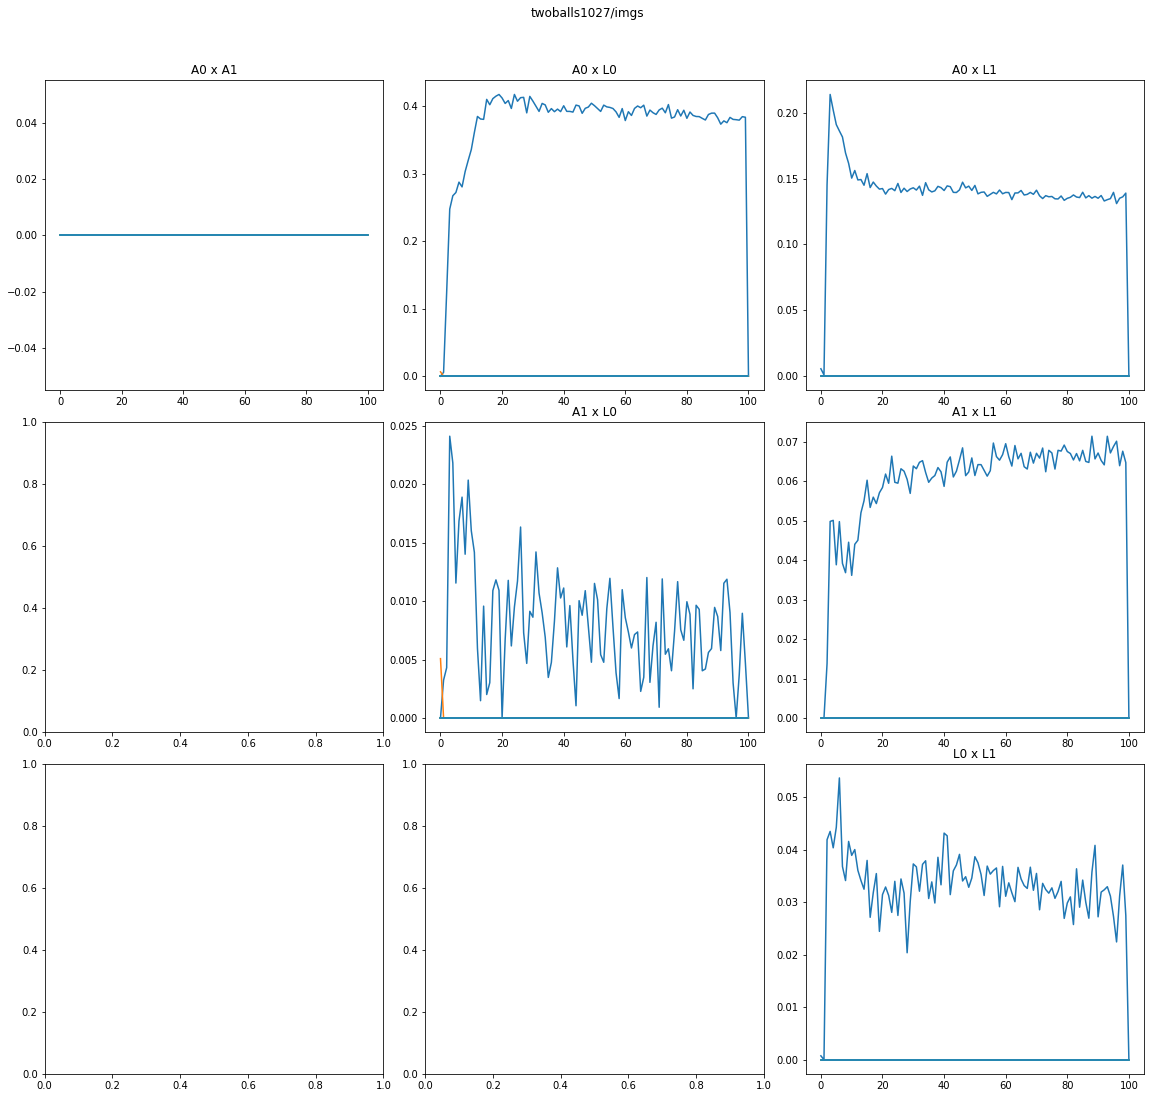

In [3]:
dodo("twoballs1027/imgs")

2021-03-07 10:46:12,270 - __main__ - INFO - processing 101 files from C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs1005/imgs


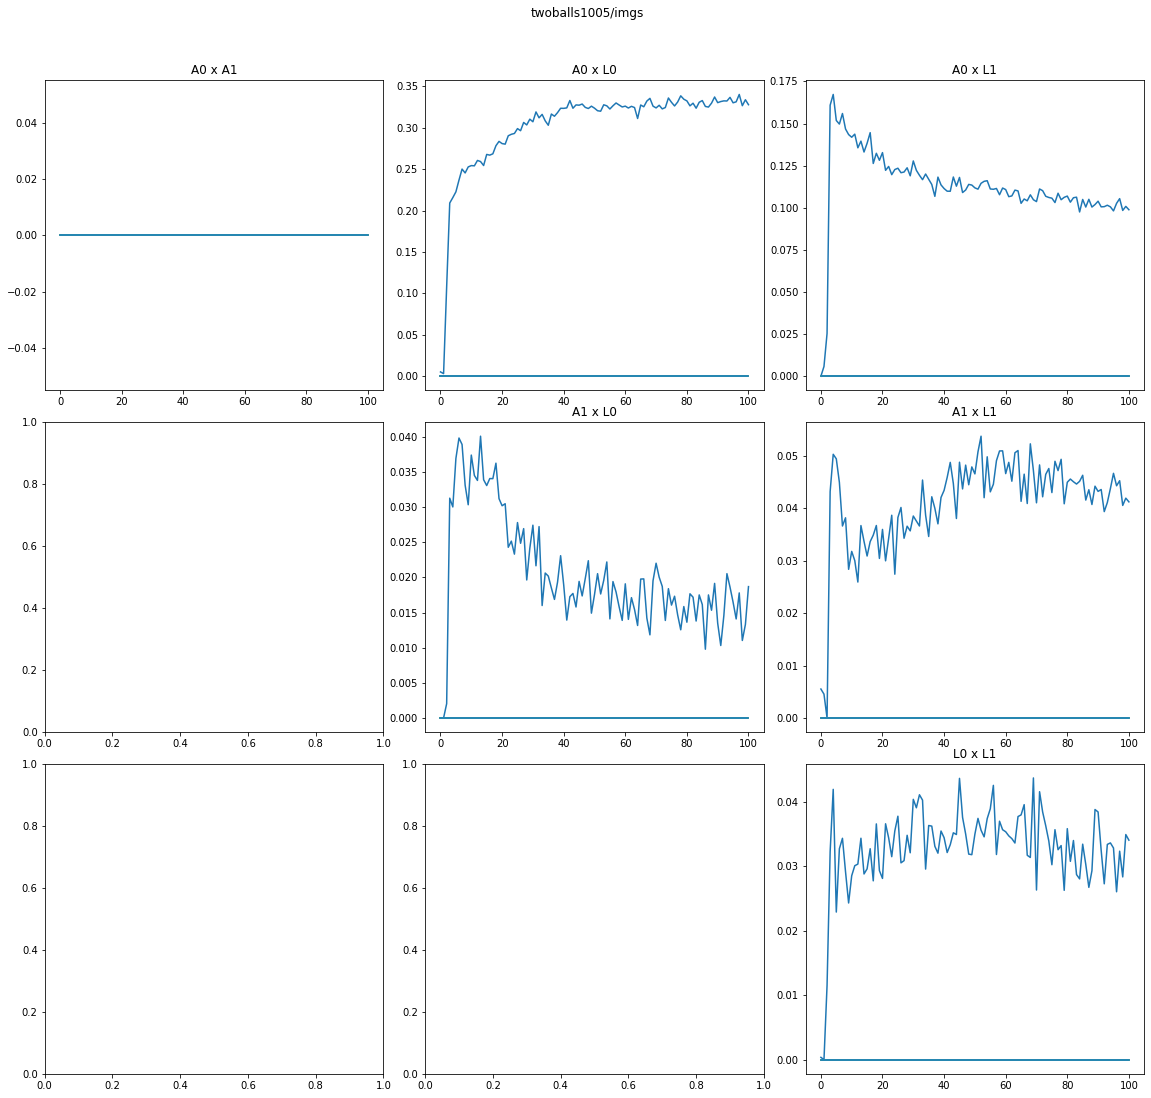

In [4]:
dodo("twoballs1005/imgs")

2021-03-07 10:46:21,381 - __main__ - INFO - processing 96 files from C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs0932/imgs


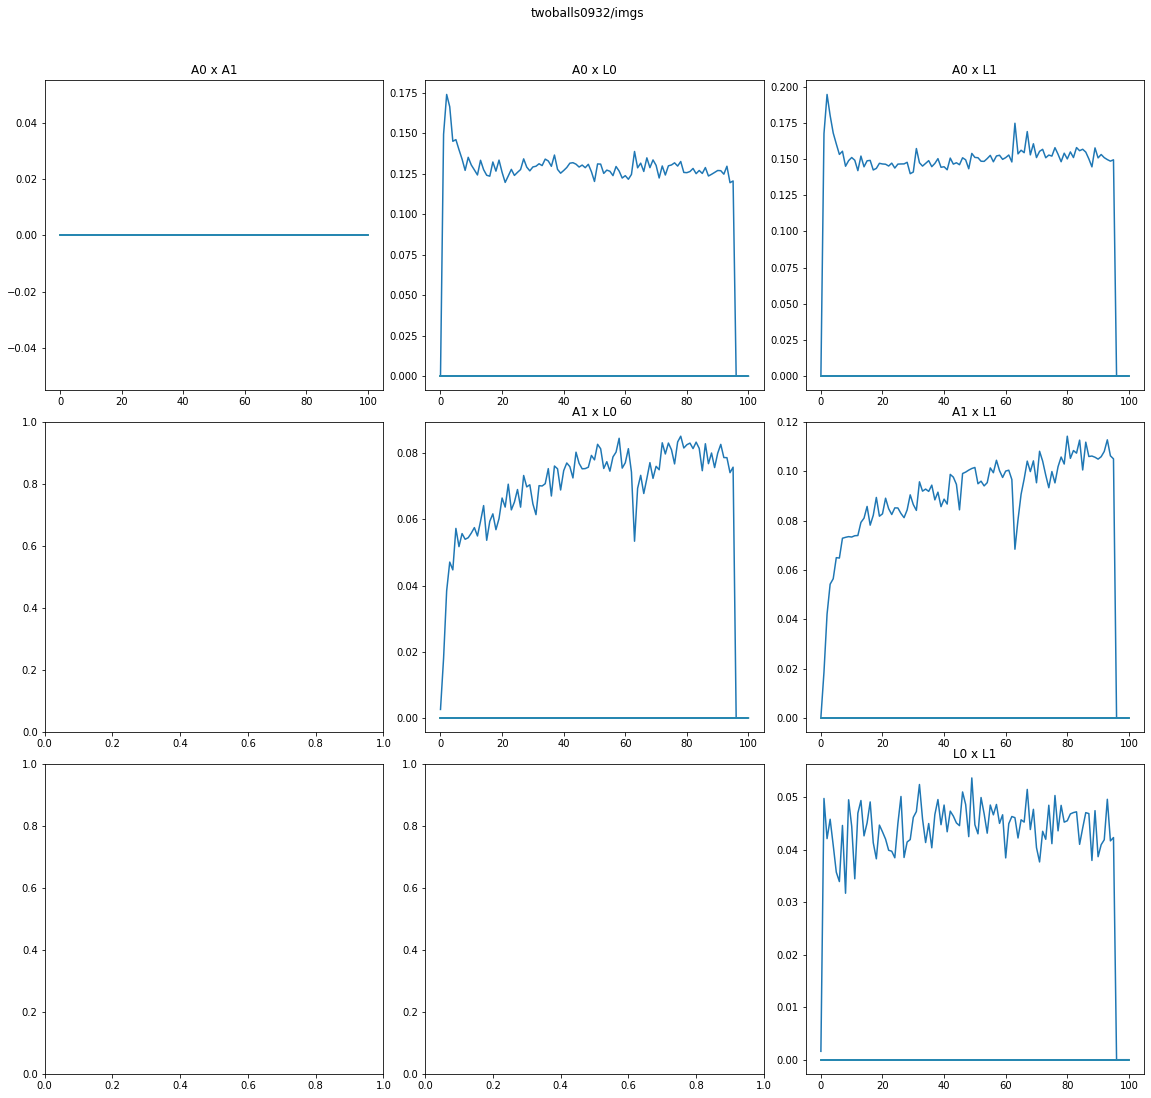

In [5]:
dodo("twoballs0932/imgs")

2021-03-07 10:58:46,884 - __main__ - INFO - processing 84 files from C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs/imgs


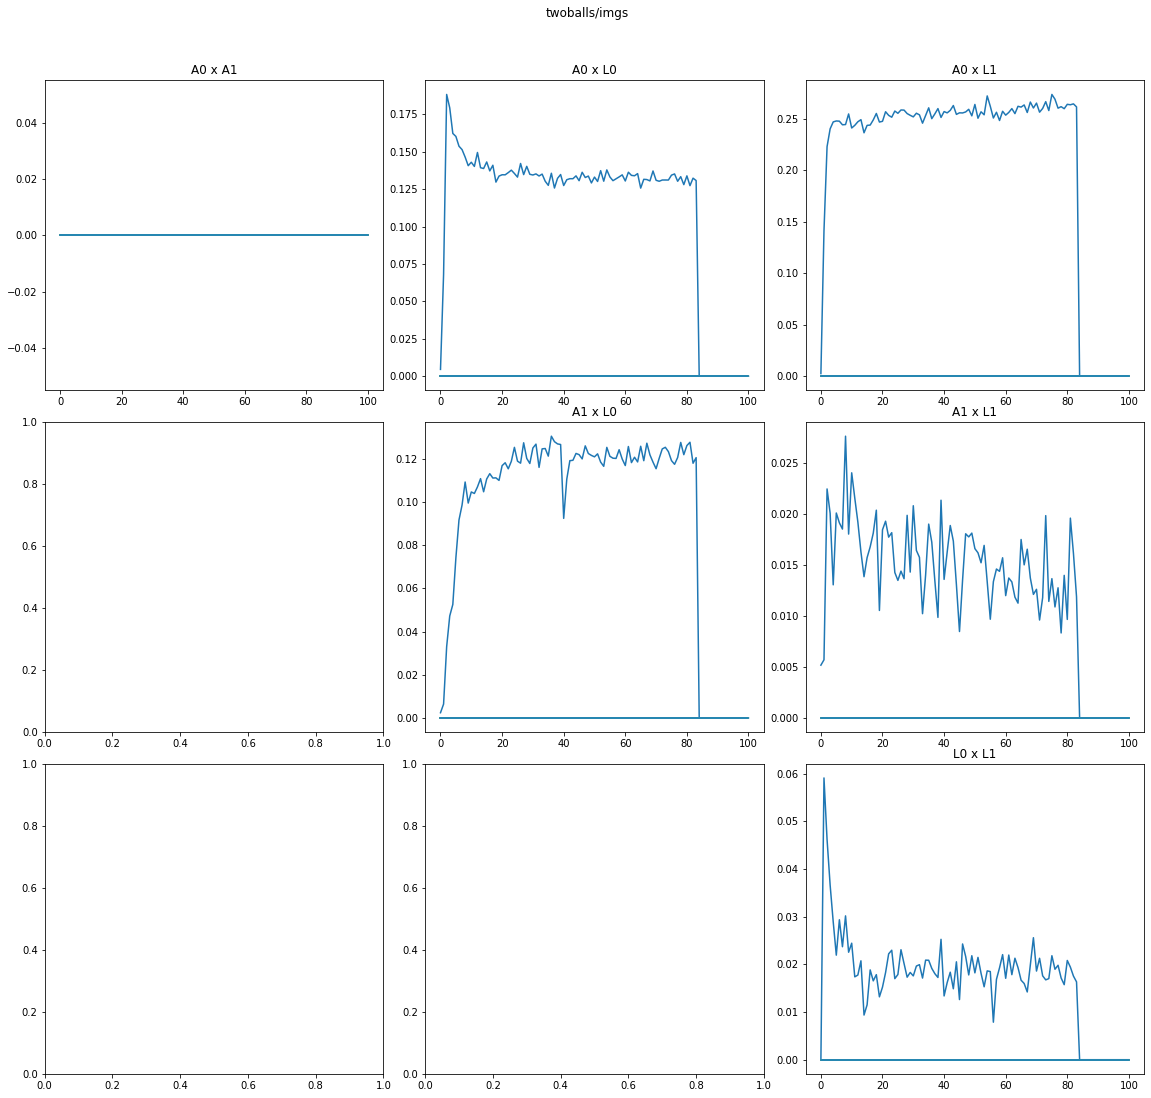

In [7]:
dodo("twoballs/imgs")